## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../data/train.p"
validation_file= "../data/valid.p"
testing_file = "../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("done")

done


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

Traffic sign images are 32x32x3 

Note: The LeNet architecture only accepts 32x32xC images, where C is the number of color channels.




In [3]:
import numpy as np

print(" Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

17


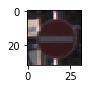

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

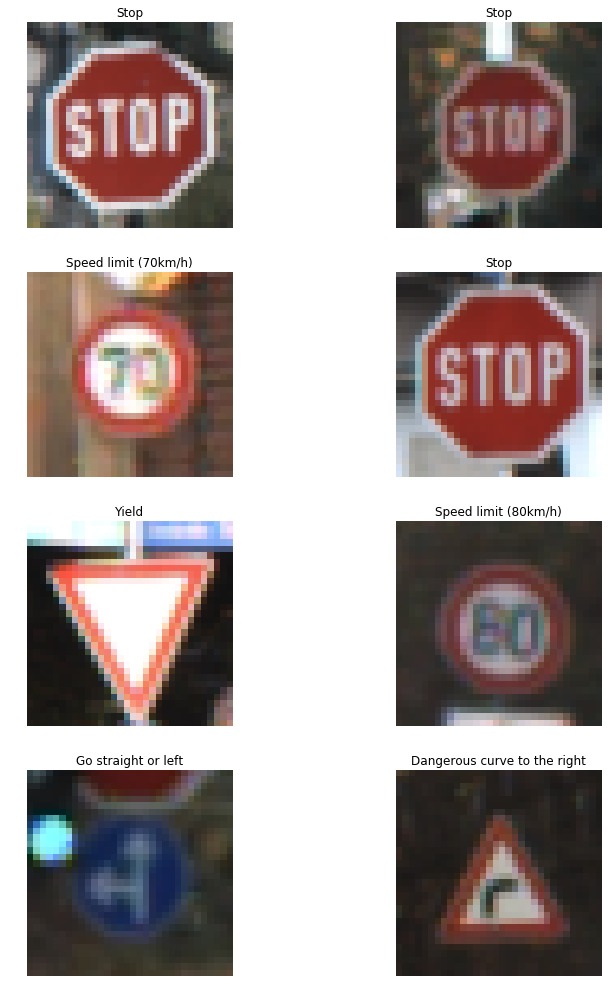

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import csv

def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()
    
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
    
number_to_stop = 8
figures = {}
labels = {}
for i in range(number_to_stop):
    index = random.randint(0, y_train.shape[0]-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
#     print(name_values[y_train[index]][1].decode('ascii'))
    figures[i] = X_train[index]
    
plot_figures(figures, 4, 2, labels)

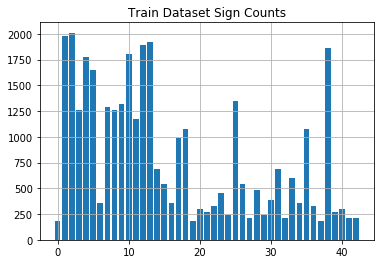

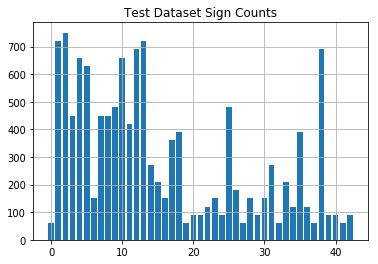

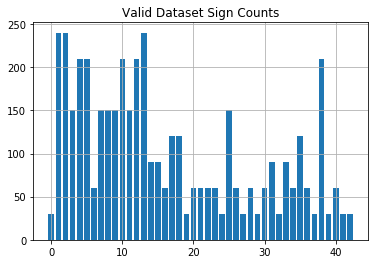

In [6]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique_valid, counts_valid = np.unique(y_valid, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from math import ceil


# Convert to grayscale
X_train_rgb = X_train
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_rgb = X_test
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

print(X_train_rgb.shape)
print(X_train_gray.shape)
print(X_valid_rgb.shape)
print(X_valid_gray.shape)
print(X_test_rgb.shape)
print(X_test_gray.shape)


(34799, 32, 32, 3)
(34799, 32, 32, 1)
(4410, 32, 32, 3)
(4410, 32, 32, 1)
(12630, 32, 32, 3)
(12630, 32, 32, 1)


Original shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


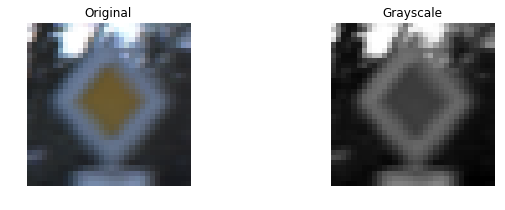

In [10]:

print("Original shape:", X_train.shape)
print("Grayscale shape:", X_train_gray.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('Original')
axs[0].imshow(X_train[5].squeeze())

axs[1].axis('off')
axs[1].set_title('Grayscale')
axs[1].imshow(X_train_gray[5].squeeze(), cmap='gray')

In [12]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray
print("done")

done


In [13]:
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(X_valid))

82.677589037
82.1484603612
83.5564273756


In [14]:
## Normalize the data

X_train_normalized = (X_train - 128)/128 
X_test_normalized = (X_test - 128)/128
X_valid_normalized =(X_valid - 128)/128

print(np.mean(X_train_normalized))
print(np.mean(X_test_normalized))
print(np.mean(X_valid_normalized))

-0.354081335648
-0.358215153428
-0.347215411128


In [15]:
X_train = X_train_normalized
X_test = X_test_normalized
X_valid = X_valid_normalized
print("done")

done


Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)


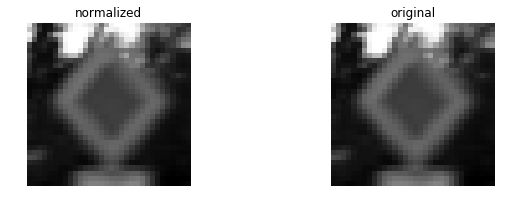

In [16]:
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[5].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[5].squeeze(), cmap='gray')

1


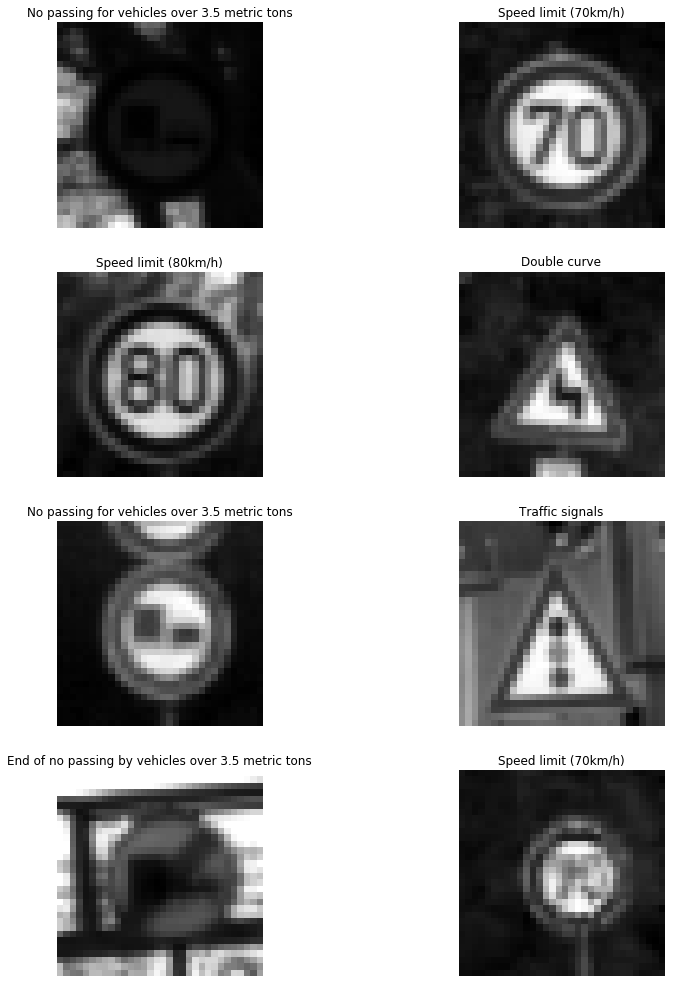

In [14]:
number_to_stop = 8
figures = {}
random_signs = []
for i in range(number_to_stop):
    index = random.randint(0, y_train.shape[0]-1)
    labels[i] = name_values[y_train[index]][1].decode('ascii')
    figures[i] = X_train[index].squeeze()
    random_signs.append(index)
    
plot_figures(figures, 4, 2, labels)

shape in/out: (32, 32, 1) (32, 32, 1)


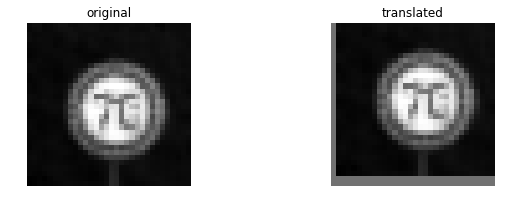

In [17]:
import cv2

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_img = X_train_normalized[23323]

test_dst = random_translate(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('translated')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


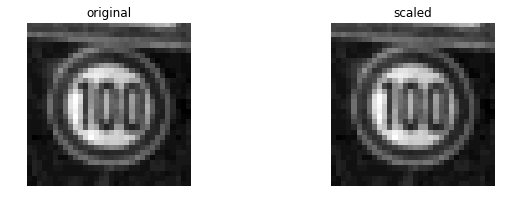

In [16]:
def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_scaling(test_img)
    
fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('scaled')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


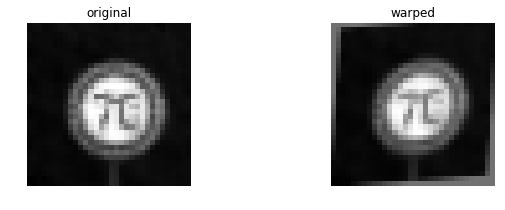

In [18]:
def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

test_dst = random_warp(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('warped')

print('shape in/out:', test_img.shape, test_dst.shape)

shape in/out: (32, 32, 1) (32, 32, 1)


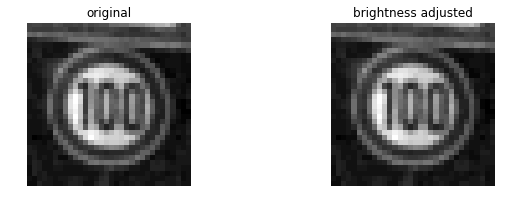

In [18]:
def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

test_dst = random_brightness(test_img)

fig, axs = plt.subplots(1,2, figsize=(10, 3))

axs[0].axis('off')
axs[0].imshow(test_img.squeeze(), cmap='gray')
axs[0].set_title('original')

axs[1].axis('off')
axs[1].imshow(test_dst.squeeze(), cmap='gray')
axs[1].set_title('brightness adjusted')

print('shape in/out:', test_img.shape, test_dst.shape)

In [19]:
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train_normalized.shape[0])
            new_img = X_train_normalized[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train_normalized = np.concatenate((X_train_normalized, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train_normalized.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|-

In [22]:
X_train = X_train_normalized
aug_train = {'features': X_train,
             'labels': y_train}
aug_val = {'features': X_valid,
             'labels': y_valid}
aug_test = {'features': X_test,
             'labels': y_test}
pickle.dump(aug_train, open( "aug_train.p", "wb" ) )
pickle.dump(aug_val, open( "aug_val.p", "wb" ) )
pickle.dump(aug_test, open( "aug_test.p", "wb" ) )

print('done')

done


In [23]:
print(X_train.shape)

(46480, 32, 32, 1)


In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "aug_train.p"
validation_file= "aug_val.p"
testing_file = "aug_test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("done")

done


In [7]:

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 46480
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


In [3]:
# Traffic sign images are 32x32x3 

# Note: The LeNet architecture only accepts 32x32xC images, where C is the number of color channels.
import numpy as np

print("Updated Image Shape: {}".format(X_train[0].shape))


Updated Image Shape: (32, 32, 1)


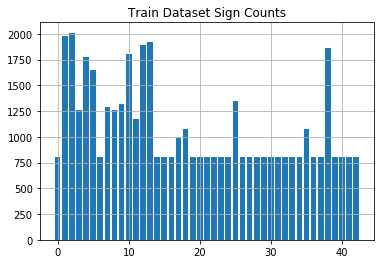

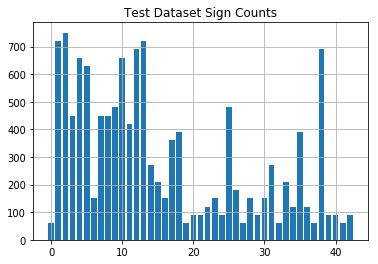

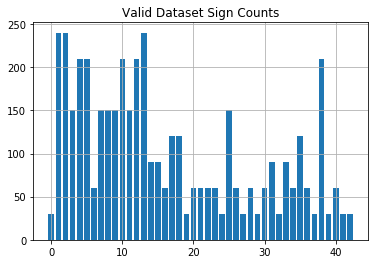

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train, counts_train)
plt.grid()
plt.title("Train Dataset Sign Counts")
plt.show()

unique_test, counts_test = np.unique(y_test, return_counts=True)
plt.bar(unique_test, counts_test)
plt.grid()
plt.title("Test Dataset Sign Counts")
plt.show()

unique_valid, counts_valid = np.unique(y_validation, return_counts=True)
plt.bar(unique_valid, counts_valid)
plt.grid()
plt.title("Valid Dataset Sign Counts")
plt.show()

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [15]:
import tensorflow as tf
import random
import csv
import numpy as np


EPOCHS = 65
BATCH_SIZE = 100

print('done')

done


In [14]:
## Shuffle the training dataset

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('done')

done


In [15]:
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_validation))

New X_train size: 46480
X_validation size: 4410


## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Layer 3: Convolutional.** The output shape should be 1x1x400.

**Activation.** Your choice of activation function.


**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.


**Layer 4: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    conv1 = x
    print("layer 1 shape:",x.get_shape())
    
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    print("Pooling layer:",x.get_shape())
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
    conv2 = x
    print("layer 2 shape:",x.get_shape())
    # TODO: Activation.
    x = tf.nn.relu(x)

    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    print("After pooling layer 2:",x.get_shape())
    
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
    print("layer 3 shape:",x.get_shape())
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    layer2 = tf.nn.dropout(layer2, keep_prob)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    print("Final Logits:",logits.get_shape())
    
    return logits ,conv1,conv2

print('done')

done


## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

print('done')

done


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.0001

logits,conv1,conv2 = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels= one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
Pooling layer: (?, 14, 14, 6)
layer 2 shape: (?, 10, 10, 16)
After pooling layer 2: (?, 5, 5, 16)
layer 3 shape: (?, 1, 1, 400)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Final Logits: (?, 43)


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [11]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("keep_prob = 1")
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print('done')

done


## Train the Model
Run the training data through the training pipeline to train the model.

Save the model after training.


In [20]:
training_acc = []
validation_acc = []
not_good = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        print(i,not_good)
        if(i > 5 and (validation_acc[i-1]<= validation_acc[i-2]) and (validation_acc[i-2]<= validation_acc[i-3]) and (validation_acc[i-3]<= validation_acc[i-4])):
            break
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print("keep_prob = 0.25")
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.25})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
            
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        training_acc.append(train_accuracy)
        validation_acc.append(validation_accuracy)
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

0 0
EPOCH 1 ...
Train Accuracy = 0.121
Validation Accuracy = 0.153

1 0
EPOCH 2 ...
Train Accuracy = 0.181
Validation Accuracy = 0.210

2 0
EPOCH 3 ...
Train Accuracy = 0.316
Validation Accuracy = 0.335

3 0
EPOCH 4 ...
Train Accuracy = 0.447
Validation Accuracy = 0.446

4 0
EPOCH 5 ...
Train Accuracy = 0.531
Validation Accuracy = 0.503

5 0
EPOCH 6 ...
Train Accuracy = 0.597
Validation Accuracy = 0.555

6 0
EPOCH 7 ...
Train Accuracy = 0.656
Validation Accuracy = 0.613

7 0
EPOCH 8 ...
Train Accuracy = 0.696
Validation Accuracy = 0.654

8 0
EPOCH 9 ...
Train Accuracy = 0.730
Validation Accuracy = 0.690

9 0
EPOCH 10 ...
Train Accuracy = 0.755
Validation Accuracy = 0.722

10 0
EPOCH 11 ...
Train Accuracy = 0.777
Validation Accuracy = 0.741

11 0
EPOCH 12 ...
Train Accuracy = 0.796
Validation Accuracy = 0.755

12 0
EPOCH 13 ...
Train Accuracy = 0.809
Validation Accuracy = 0.765

13 0
EPOCH 14 ...
Train Accuracy = 0.826
Validation Accuracy = 0.777

14 0
EPOCH 15 ...
Train Ac

INFO:tensorflow:Restoring parameters from ./lenet


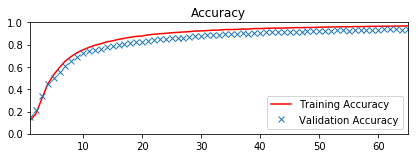

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
acc_plot = plt.subplot(211)
acc_plot.set_title('Accuracy')
epoch = [x+1 for x in range(65)]
acc_plot.plot(epoch,training_acc , 'r', label='Training Accuracy')
acc_plot.plot(epoch, validation_acc, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([1,65])
acc_plot.legend(loc=4)
plt.tight_layout()

In [23]:
print("Training accuracy",max(training_acc))
print("Validation accuracy",max(validation_acc))

Training accuracy 0.969255614558
Validation accuracy 0.938322004277


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.925


INFO:tensorflow:Restoring parameters from ./lenet
First convolutional layer
Second convolutional layer


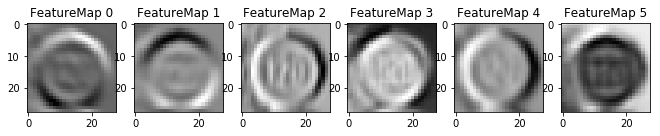

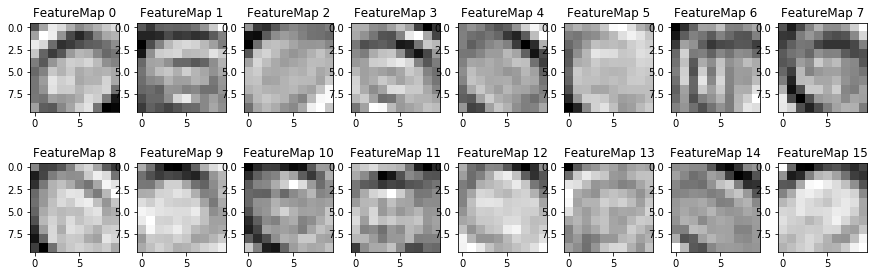

In [16]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# Note: that to get access to tf_activation, the session should be interactive which can be achieved with the following commands.
sess = tf.InteractiveSession()
sess.as_default()
# # mu = 0
# sigma = 0.1
# conv1_W =  tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean = mu , stddev =sigma ))
# tf_activation = conv1_W
# image_input = image
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and    max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    ix = int(np.random.random() * X_train.shape[0])
    #print(ix)
    random_image = np.expand_dims(X_train[ix], axis=0)
    #print('Feature maps for', signnames[y_test[ix]])

    print('First convolutional layer')
    outputFeatureMap(random_image, conv1, plt_num=1)
    print('Second convolutional layer')
    outputFeatureMap(random_image, conv2, plt_num=2)

In [1]:
# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

print('done')

done


(6, 32, 32, 1)


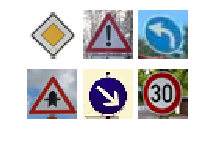

In [4]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,3, figsize=(3, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./german-traffic-signs/*x.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

my_labels = [12, 18 , 34,  11, 38, 1 ]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 1.000


In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')
my_labels = [12, 18 , 34,  11, 38, 1 ]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})


    for i, image in enumerate(my_images):
        input_image_label = name_values[my_labels[i]]
        print("Input Image label ",input_image_label)
        print("-" * 40)
        guess1 = my_top_k[1][i][0]
        label1 = name_values[guess1][1].decode('ascii')
        str1 ="1st Guess :"+ label1+"("+str(guess1)+")\n"+str(100*my_top_k[0][i][0])[:4] +"%\n"
        print(str1)
        guess2 = my_top_k[1][i][1]
        label2 = name_values[guess2][1].decode('ascii')
        str2 ="2nd Guess :"+ label2+"("+str(guess2)+")\n"+str(100*my_top_k[0][i][1])[:4] +"%\n"
        print(str2)
        guess3 = my_top_k[1][i][2]
        label3 = name_values[guess3][1].decode('ascii')
        str3 ="3rd Guess :"+ label3+"("+str(guess3)+")\n"+str(100*my_top_k[0][i][2])[:4] +"%\n"
        print(str3)
        guess4 = my_top_k[1][i][3]
        label4 = name_values[guess3][1].decode('ascii')
        str4 ="4th Guess :"+ label3+"("+str(guess3)+")\n"+str(100*my_top_k[0][i][3])[:4] +"%\n"
        print(str4)
        guess5 = my_top_k[1][i][4]
        label5 = name_values[guess3][1].decode('ascii')
        str5 ="5th Guess :"+ label3+"("+str(guess3)+")\n"+str(100*my_top_k[0][i][4])[:4] +"%\n"
        print(str5)
        print("-" * 40)


INFO:tensorflow:Restoring parameters from ./lenet
Input Image label  (12, b'Priority road')
----------------------------------------
1st Guess :Priority road(12)
99.9%

2nd Guess :Roundabout mandatory(40)
0.02%

3rd Guess :No vehicles(15)
5.15%

4th Guess :No vehicles(15)
6.07%

5th Guess :No vehicles(15)
3.35%

----------------------------------------
Input Image label  (18, b'General caution')
----------------------------------------
1st Guess :General caution(18)
91.6%

2nd Guess :Traffic signals(26)
7.64%

3rd Guess :Pedestrians(27)
0.70%

4th Guess :Pedestrians(27)
0.00%

5th Guess :Pedestrians(27)
0.00%

----------------------------------------
Input Image label  (34, b'Turn left ahead')
----------------------------------------
1st Guess :Turn left ahead(34)
99.9%

2nd Guess :Keep right(38)
0.00%

3rd Guess :Children crossing(28)
0.00%

4th Guess :Children crossing(28)
0.00%

5th Guess :Children crossing(28)
0.00%

----------------------------------------
Input Image label  (11, 

INFO:tensorflow:Restoring parameters from ./lenet


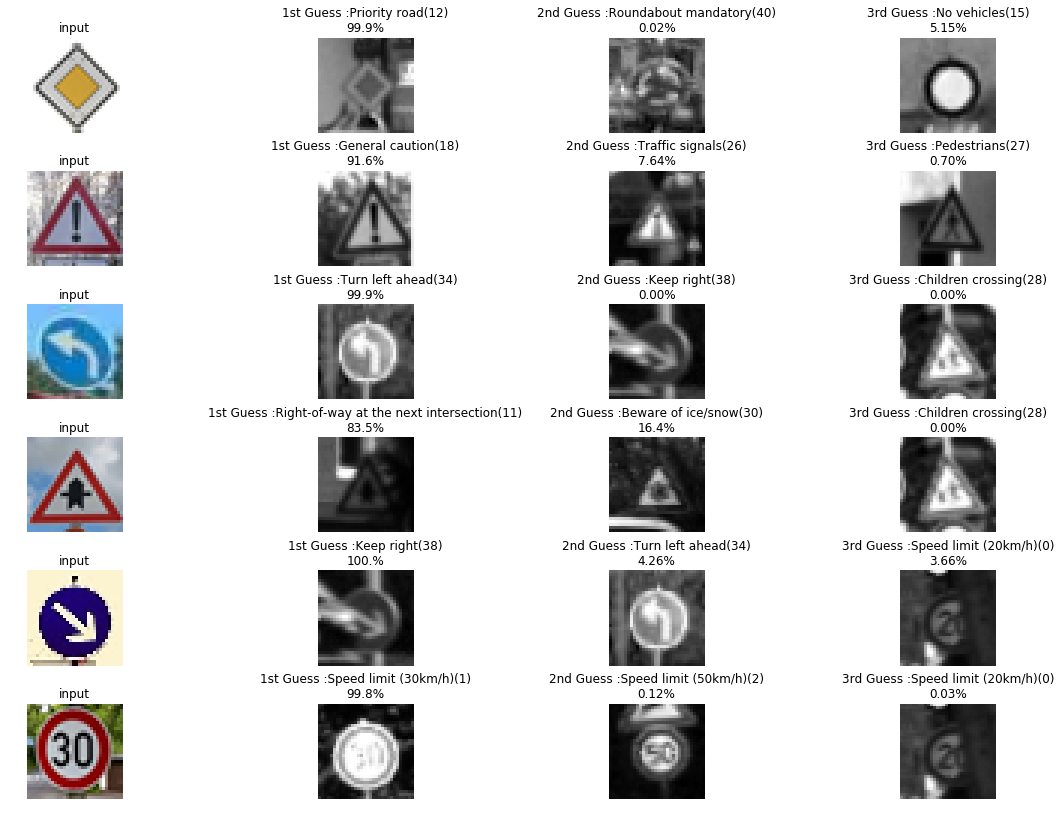

In [12]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)
name_values = np.genfromtxt('signnames.csv', skip_header=1, dtype=[('myint','i8'), ('mysring','S55')], delimiter=',')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images_normalized, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images_normalized, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(my_images),4, figsize=(20, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        label1 = name_values[guess1][1].decode('ascii')
        str1 ="1st Guess :"+ label1+"("+str(guess1)+")\n"+str(100*my_top_k[0][i][0])[:4] +"%"
        axs[4*i+1].set_title(str1)
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        label2 = name_values[guess2][1].decode('ascii')
        str2 ="2nd Guess :"+ label2+"("+str(guess2)+")\n"+str(100*my_top_k[0][i][1])[:4] +"%"
        axs[4*i+2].set_title(str2)
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        label3 = name_values[guess3][1].decode('ascii')
        str3 ="3rd Guess :"+ label3+"("+str(guess3)+")\n"+str(100*my_top_k[0][i][2])[:4] +"%"
        axs[4*i+3].set_title(str3)

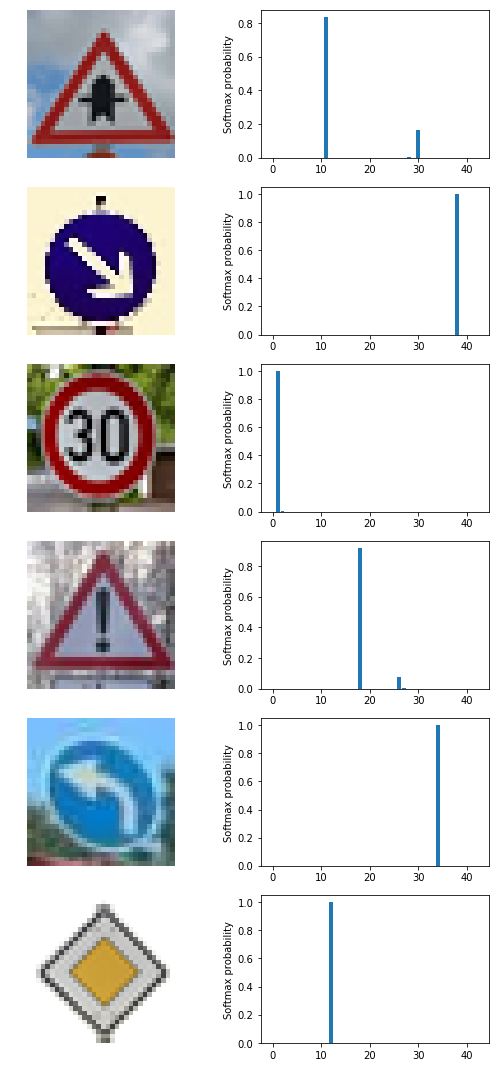

In [30]:
fig, axs = plt.subplots(6,2, figsize=(9, 19))
axs = axs.ravel()


for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(cv2.cvtColor(my_images[i//2], cv2.COLOR_BGR2RGB))
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')